In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [53]:
# Load the dataset
df_tracks = pd.read_csv(r'/kaggle/input/spotify-datasets/tracks.csv')

# Display the first few rows of the dataset to understand its structure
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [7]:
# Print concise summary of df_tracks DataFrame including column names, data types, non-null counts, and memory usage.
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

In [4]:
# Count the number of non-null entries in each column
df_tracks.count()

# This helps us understand the completeness of the data and identify columns that might have missing values.

id                  586672
name                586601
popularity          586672
duration_ms         586672
explicit            586672
artists             586672
id_artists          586672
release_date        586672
danceability        586672
energy              586672
key                 586672
loudness            586672
mode                586672
speechiness         586672
acousticness        586672
instrumentalness    586672
liveness            586672
valence             586672
tempo               586672
time_signature      586672
dtype: int64

In [5]:
# Check for null values in the DataFrame
pd.isnull(df_tracks).sum()

# This helps us understand which columns have missing data and how many entries are missing.

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
# Count and print missing values in each column after dropping NaN values
df_tracks = df_tracks.dropna(subset=['name'])
print(pd.isnull(df_tracks).sum())

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [15]:
# Calculate 'duration' in seconds from 'duration_ms' column,
# rounding to nearest second, and assign to new column 'duration'.
df_tracks["duration"]= df_tracks["duration_ms"].apply(lambda x: round(x/1000))
df_tracks.drop("duration_ms", inplace=True, axis=1)

In [9]:
# Descriptive statistics of numeric columns in df_tracks DataFrame, transposed for easy readability.
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586601.0,27.573212,18.369417,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586601.0,230054.852626,126532.824981,3344.0,175083.0000,214907.000000,263867.00000,5621218.000
explicit,586601.0,0.044091,0.205298,0.0,0.0000,0.000000,0.00000,1.000
danceability,586601.0,0.563612,0.166101,0.0,0.4530,0.577000,0.68600,0.991
energy,586601.0,0.542071,0.251910,0.0,0.3430,0.549000,0.74800,1.000
key,586601.0,5.221594,3.519420,0.0,2.0000,5.000000,8.00000,11.000
loudness,586601.0,-10.205789,5.089422,-60.0,-12.8910,-9.242000,-6.48100,5.376
mode,586601.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586601.0,0.104870,0.179902,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586601.0,0.449803,0.348812,0.0,0.0969,0.422000,0.78400,0.996


In [13]:
# Set 'release_date' column as the index of df_tracks DataFrame
df_tracks.set_index("release_date", inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index)
df_tracks.head()

# Makes it easier to create time series plots and visualizations, where the x-axis would represent time

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## **Top 5 Records By Popularity**

In [49]:
sorted_df = df_tracks[['name', 'artists', 'popularity']].sort_values(by='popularity', ascending=False)
sorted_df.head()

,name,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
93803,drivers license,['Olivia Rodrigo'],99
93804,Astronaut In The Ocean,['Masked Wolf'],98
92811,telepatía,['Kali Uchis'],97
92810,Save Your Tears,['The Weeknd'],97


* The sorted_df DataFrame displays the top 5 tracks from df_tracks, sorted by their popularity in descending order.
* This representation provides a quick overview of top 5 most popular tracks in the dataset.

## **Number of Tracks that have popularity greater than 90**

In [52]:
most_popular_90 = df_tracks[['popularity']].query('popularity>90', inplace = False)
most_popular_90.sort_values('popularity', ascending = False )
print(most_popular_90.count())

popularity    37
dtype: int64


* The dataset contains 37 records where tracks have a popularity score greater than 90.

## **Top 10 most popular tracks with popularity score greater than 90**

In [5]:
most_popular = df_tracks[['name','artists','popularity']].query('popularity>90', inplace = False).sort_values('popularity', ascending = False )
most_popular[:10]

,name,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
93803,drivers license,['Olivia Rodrigo'],99
93804,Astronaut In The Ocean,['Masked Wolf'],98
92811,telepatía,['Kali Uchis'],97
92810,Save Your Tears,['The Weeknd'],97
92813,Blinding Lights,['The Weeknd'],96
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
92814,The Business,['Tiësto'],95
91866,Streets,['Doja Cat'],94
93806,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94


* The table lists the top 10 most popular tracks from the dataset with track name 'Peaches' being the most popular.

## **Top 10 least popular tracks**

In [7]:
most_popular = df_tracks[['name','artists','popularity']].sort_values('popularity', ascending = True )
most_popular[:10]

,name,artists,popularity
21,Capítulo 1.22 - Banquero Anarquista,['Fernando Pessoa'],0
22,La Maleva - Remasterizado,['Ignacio Corsini'],0
23,Capítulo 2.3 - Banquero Anarquista,['Fernando Pessoa'],0
24,Capítulo 1.2 - Banquero Anarquista,['Fernando Pessoa'],0
25,J'ai Vendu Mon Âme,['Adolphe Bérard'],0
27,En la Huella del Querer - Remasterizado,['Ignacio Corsini'],0
28,C'est La Mode Et Voila Tout,['Perchicot'],0
29,Chapter 1.6 - Szkolne przygody Pimpusia Sadełko,['Maria Konopnicka'],0
133,La Muchacha - Remasterizado,['Ignacio Corsini'],0
134,Stardust,['Dick Haymes'],0


* The table lists the top 10 least popular tracks from the dataset

In [12]:
# Sampling Data for Analysis
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))
print(len(sample_df))

2346


## **Relationship between Loudness and Energy in Music**

<Axes: xlabel='energy', ylabel='loudness'>

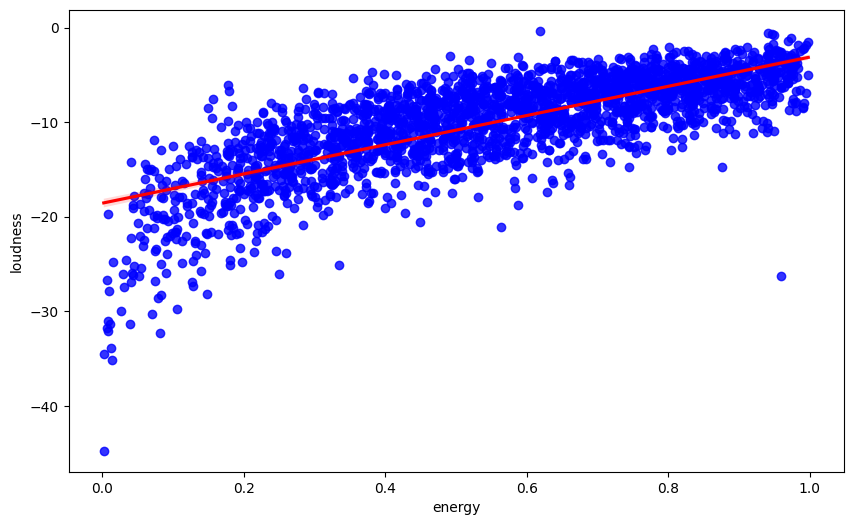

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="loudness", x="energy", color="b", line_kws={"color":"red"})

* The scatter plot shows a positive correlation between loudness and energy.
* The plot tells us that as the perceived loudness increases, the energy level also increases.

## **Relationship between Popularity and Acousticness**

[Text(0.5, 1.0, 'Popularity vs Acousticness')]

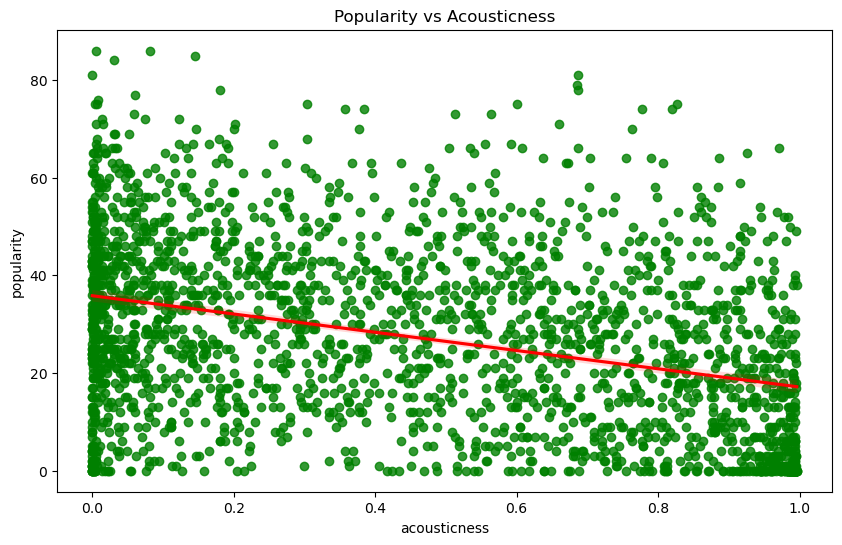

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y= "popularity", x = "acousticness", color = "g", line_kws={"color":"red"}).set(title="Popularity vs Acousticness")

* The scatter plot shows a weak positive correlation between popularity and acousticness. 
* Songs with higher acousticness to be less popular. 
* The Data points are spread out widely across the graph indicating that there is a lot of variability in the relationship.

## **Correlation Between Variables**

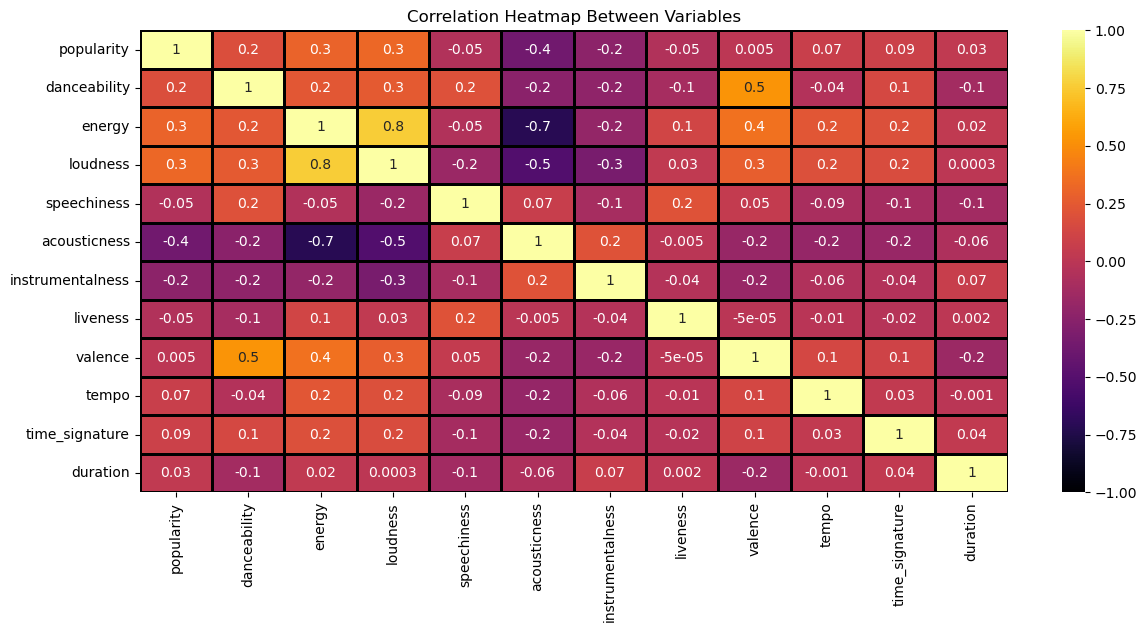

In [20]:
# Drop non-numeric columns and calculate correlation matrix
corr_df = df_tracks.drop(["key", "mode", "explicit"], axis=1).corr(method="pearson", numeric_only=True)

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

* There is a weak positive correlation between popularity and valence (how positive the music is).
* There is a weak negative correlation between popularity and speechiness (how much talking is in the music).
* There is a moderate positive correlation between danceability and energy (how energetic it is).
* There is a weak positive correlation between instrumentalness and acousticness (Instrumentalness to vocals).

## **Duration of Songs over the Years**

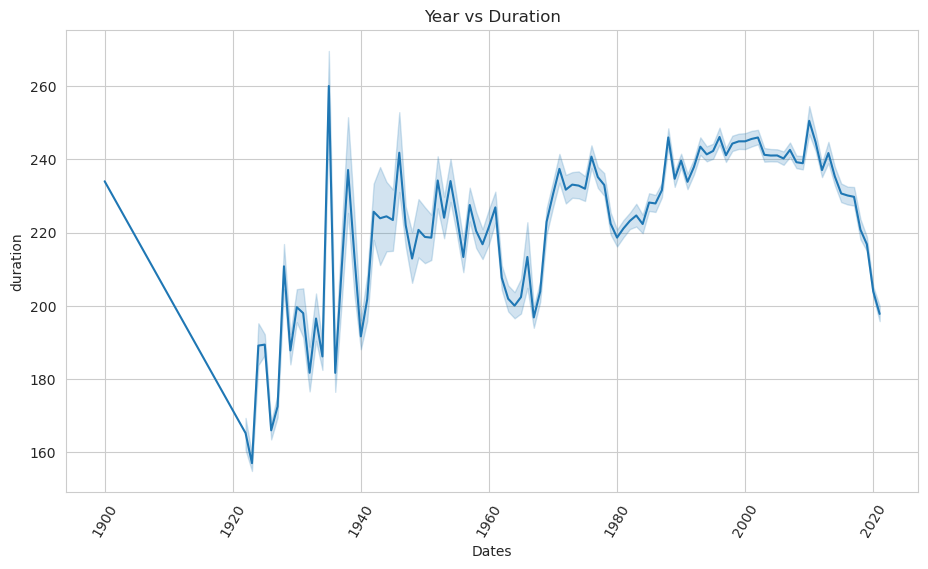

In [24]:
total_dr=df_tracks['duration']
sns.set_style(style="whitegrid")
plt.figure(figsize = (11,6))
sns.lineplot(x=years, y=total_dr).set(title = "Year vs Duration")
plt.xlabel('Dates')
plt.ylabel('Duration')
plt.xticks(rotation=60)
plt.show()

* The average length of songs has steadily increased over time, reaching around 5 minutes by 2020.
* However, since 2020 there is a constant drop in duration of songs .

In [19]:
# Load the SpotifyFeatures dataset
df_genre = pd.read_csv(r'/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv')
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## **Average Popularity by Genre**

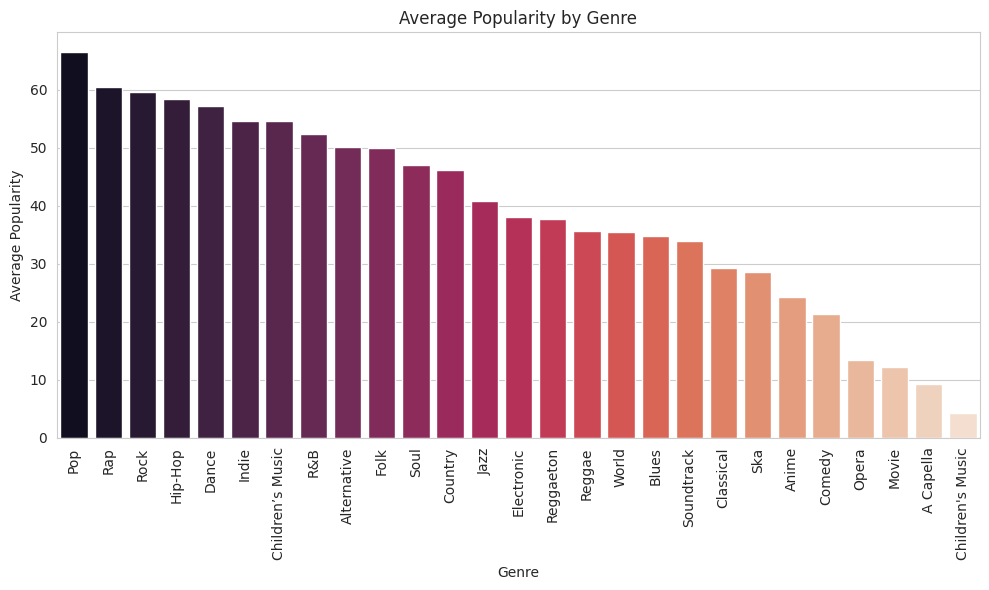

In [45]:
avg_popularity_by_genre = df_genre.groupby('genre')['popularity'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))  
sns.barplot(x=avg_popularity_by_genre.index, y=avg_popularity_by_genre.values, palette="rocket")
plt.xlabel("Genre") 
plt.ylabel("Average Popularity")  
plt.title("Average Popularity by Genre")
plt.xticks(range(len(avg_popularity_by_genre.index)), rotation=90)  
plt.tight_layout()
plt.show()

* The most popular genre according to this data is "Pop".
* Other genres with high average popularity include Rock, Hip Hop, Dance, and R&B.
* Genre with lowest average popularity is Childrens's Music.

## **Number of Songs per Year**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


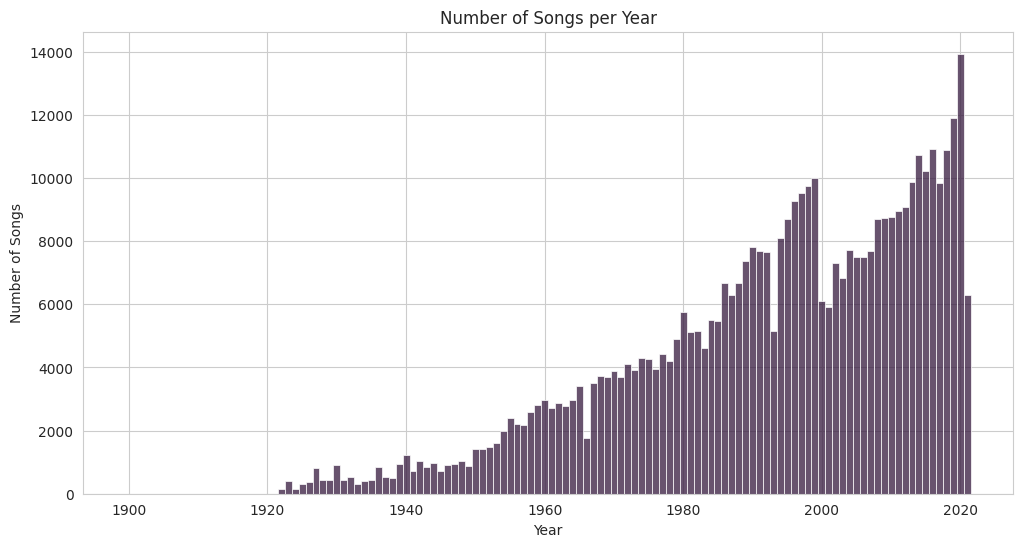

In [43]:
# Convert 'release_date' to datetime, handling errors
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], errors='coerce')
df_tracks['year'] = df_tracks['release_date'].dt.year

plt.figure(figsize=(12, 6))
sns.histplot(data=df_tracks, x='year', discrete=True, bins=30, kde=False)
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()


* The line graph shows a steady increase in the number of songs released every year since 1922.

## **Duration of Songs across Different Genres**

Text(0, 0.5, 'Genres')

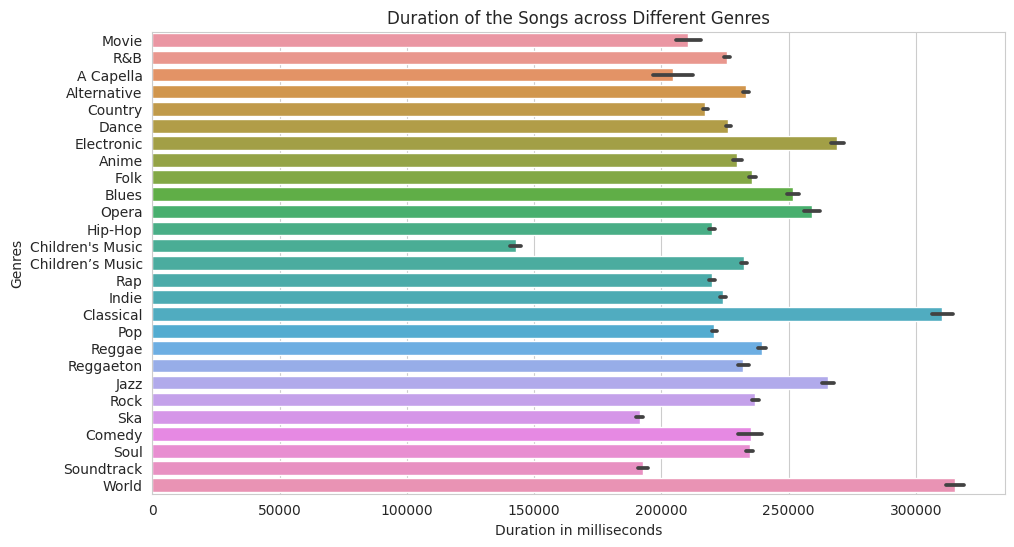

In [41]:
plt.figure(figsize=(11,6))
plt.title("Duration of the Songs across Different Genres")
sns.color_palette("rocket", as_cmap = True)
sns.barplot (y='genre', x='duration_ms', data=df_genre)
plt.xlabel("Duration in milliseconds")
plt.ylabel("Genres")

* The genres with the shortest average song length appear to be Classical followed by Pop, and Jazz which is 2 minutes.
* Genres with a longer average song length include Reggae, World, and Ska exceeding 2.5 minutes.